# Solutions to 1st-order ODEs

## 1. Solution by direct integration

When equations are of this form, we can directly integrate:

\begin{align}
\frac{dy}{dx} &= y^{\prime} = f(x) \\
\int dy &= \int f(x) dx \\
y(x) &= \int f(x) dx + C
\end{align}

For example:
\begin{align}
\frac{dy}{dx} &= x^2 \\
y(x) &= \frac{1}{3} x^3 + C
\end{align}

While these problems look simple, there may not be an obvious closed-form solution to all:

\begin{align}
\frac{dy}{dx} &= e^{-x^2} \\
y(x) &= \int e^{-x^2} dx + C
\end{align}

(You may recognize this as leading to the error function, $\text{erf}$:
$\frac{1}{2} \sqrt{\pi} \text{erf}(x) + C$,
so the exact solution to the integral over the range $[0,1]$ is 0.7468.)

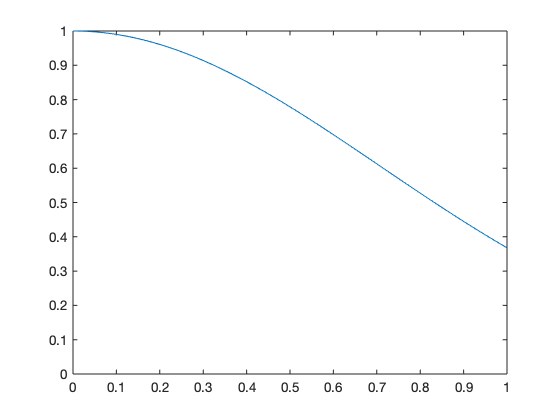

In [18]:
x = linspace(0, 1);
f = @(x) exp(-x.^2);
plot(x, f(x))
axis([0 1 0 1])

## Trapezoidal rule: numerical integration

In such cases, we can find the integral by using the **trapezoidal rule**, which finds the area under the curve by creating trapezoids and summing their areas:
\begin{equation}
\text{area under curve} = \sum \left( \frac{f(x_{i+1}) + f(x_i)}{2} \right) \Delta x
\end{equation}

Let's see what this looks like with four trapezoids ($\Delta x = 0.25$):

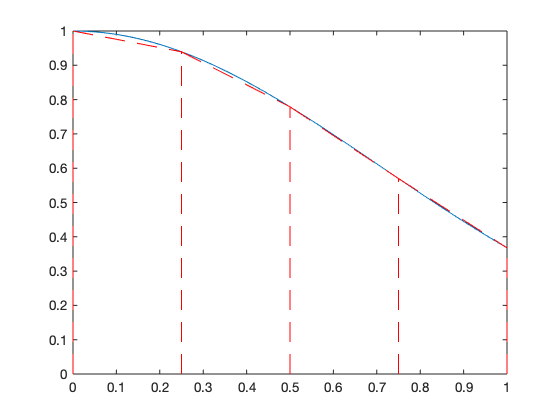

In [31]:
hold off
x = linspace(0, 1);
plot(x, f(x)); hold on
axis([0 1 0 1])

x = 0 : 0.25 : 1;

% plot the trapezoids
for i = 1 : length(x)-1
    xline = [x(i), x(i)];
    yline = [0, f(x(i))];
    line(xline, yline, 'Color','red','LineStyle','--')
    xline = [x(i+1), x(i+1)];
    yline = [0, f(x(i+1))];
    line(xline, yline, 'Color','red','LineStyle','--')
    xline = [x(i), x(i+1)];
    yline = [f(x(i)), f(x(i+1))];
    line(xline, yline, 'Color','red','LineStyle','--')
end
hold off

In [32]:
dx = 0.1;
x = 0.0 : dx : 1.0;

area = 0.0;
for i = 1 : length(x)-1
    area = area + (dx/2)*(f(x(i)) + f(x(i+1)));
end

fprintf('Numerical integral: %f\n', area)
exact = 0.5*sqrt(pi)*erf(1);
fprintf('Exact integral: %f\n', exact)
fprintf('Error: %f %%\n', 100.*abs(exact-area)/exact)

Numerical integral: 0.746211
Exact integral: 0.746824
Error: 0.082126 %


We can see that using the trapezoidal rule, a numerical integration method, with an internal size of $\Delta x = 0.1$ leads to an approximation of the exact integral with an error of 0.08%.

You can make the trapezoidal rule more accurate by:
- using more segments (that is, a smaller value of $\Delta x$, or
- using higher-order polynomials (Simpson's rules) over the simpler trapezoids.

## Error

Applying the trapezoidal rule introduces the concept of **error** in numerical approximations.

There are two main kinds of error, that we'll come back to later:
- **truncation error**, which is local and represents how "wrong" each interval/step is compared with the exact solution; and
- **global error**, which is the sum of the truncation errors over the entire method.

There is also **round-off error**, which is caused by the loss of significant digits.

## 2. Solution by separation of variables

If the given derivative is a separate function of $x$ and $y$, then we can solve via separation of variables:
\begin{align}
\frac{dy}{dx} &= f(x) g(y) = \frac{h(x)}{j(y)} \\
\int \frac{1}{g(y)} dy &= \int f(x) dx
\end{align}

For example, consider this problem:
\begin{equation}
y^{\prime} = \frac{dy}{dx} = 1 + y^2 \\
\end{equation}
We can separate this into a problem that looks like $f(y) dy = g(x) dx$, where $dy = \frac{1}{1+y^2}$ and $g(x) = 1$.
\begin{align}
\int \frac{dy}{1 + y^2} &= \int dx \\
\arctan y &= x + c \\
y(x) &= \tan(x+c)
\end{align}

Unfortunately, not every separable ODE can be integrated:
\begin{align}
\frac{dy}{dx} &= \frac{e^x / 2 + 5}{y^2 + \cos y} \\
(y^2 + \cos y) dy &= (e^x / 2 + 5) dx
\end{align}

## 3. General solution to linear 1st-order ODEs

Given a general linear 1st-order ODE of the form
\begin{equation}
\frac{dy}{dx} + p(x) y = q(x)
\end{equation}
we can solve by integration factor:
\begin{equation}
y(x) = e^{-\int p(x) dx} \left[ \int e^{\int p(x) dx} q(x) dx + C \right]
\end{equation}

For example, in this equation
\begin{equation}
y^{\prime} + xy - 5 e^x = 0
\end{equation}
after rearranging to the standard form
\begin{equation}
y^{\prime} + xy = 5 e^x
\end{equation}
we see that $p(x) = x$ and $q(x) = 5e^x$.

## 4. Solution to nonlinear 1st-order ODEs

Given a general nonlinear 1st-order ODE
\begin{equation}
\frac{dy}{dx} + p(x) y = q(x) y^a 
\end{equation}
where $a \neq 1$ and $a$ is a constant. This is known as the Bernoulli equation.

We can solve by transforming to a linear equation, by changing the dependent variable from $y$ to $z$:
\begin{align}
\text{let} \quad z &= y^{1-a} \\
\frac{dz}{dx} &= (1-a) y^{-a} \frac{dy}{dx}
\end{align}
Multiply the original equation by $(1-a) y^{-a}$:
\begin{align}
(1-a) y^{-a} \frac{dy}{dx} + (1-a) y^{-a} p(x) y &= (1-a) y^{-a} q(x) y^a \\
\frac{dz}{dx} + p(x) (1-a) z &= q(x) (1-a) \;,
\end{align}
which is now a *linear* first-order ODE, that looks like
\begin{equation}
\frac{dz}{dx} + p(x)^{\prime} z = q(x)^{\prime}
\end{equation}
where $p(x)^{\prime} = (1-a) p(x)$ and $q(x)^{\prime} = (1-a)q(x)$. 

We can solve this using the integrating-factor approach discussed above. Then, once we have $z(x)$, we can find $y(x)$:
\begin{align}
z &= y^{1-a} \\
y &= z^{\frac{1}{1-a}}
\end{align}